Librerías importadas correctamente
Archivos cargados desde Colab
Dataset Matemáticas: 395 filas x 33 columnas
Dataset Portugués: 649 filas x 33 columnas

Primeras 10 filas:
  school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other     other   
7     GP   F   17       U     GT3       A     4     4     other   teacher   
8     GP   M   15       U     LE3       A     3     2  services     other   
9     GP   M   15       U     GT3       T     3     4    

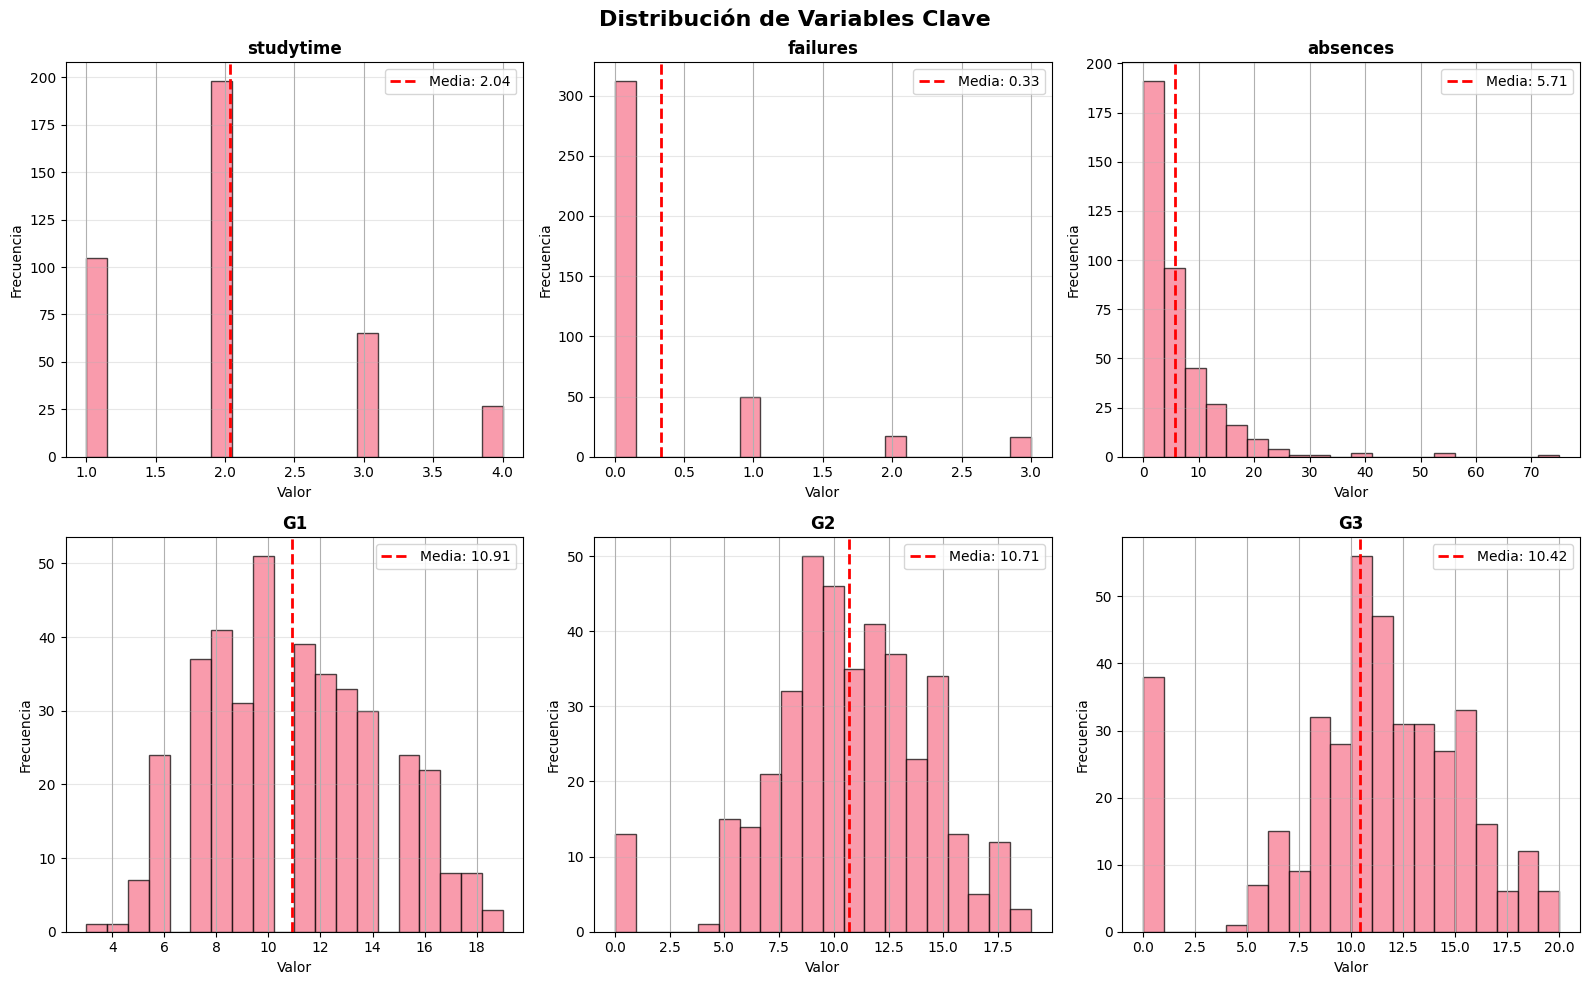

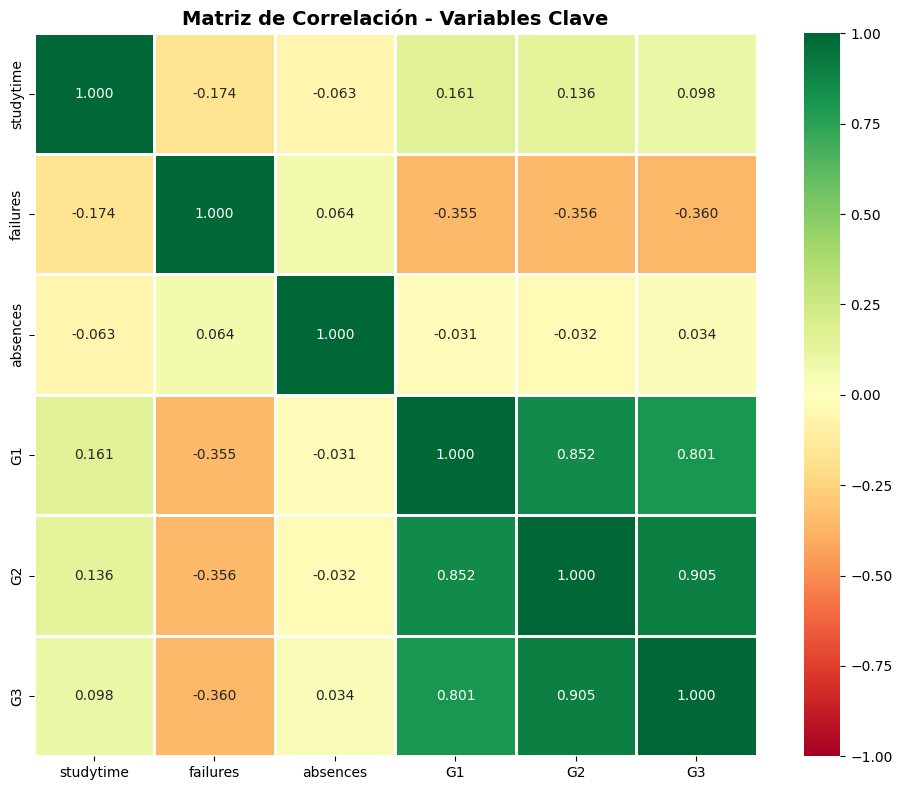


Correlaciones con G3 (Nota Final):
G3           1.000000
G2           0.904868
G1           0.801468
studytime    0.097820
absences     0.034247
failures    -0.360415
Name: G3, dtype: float64


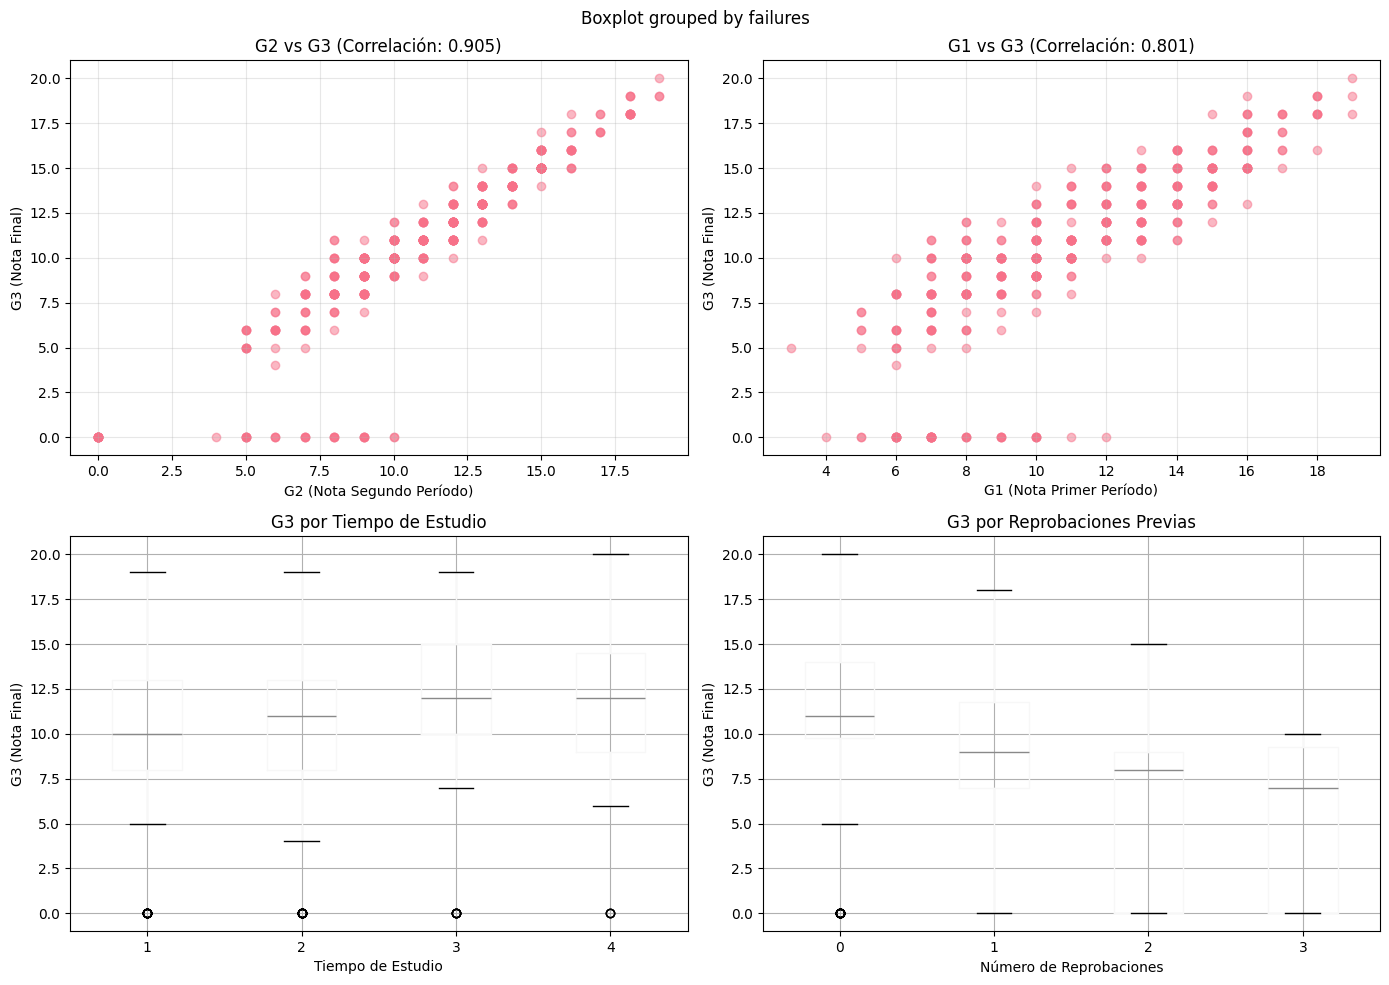


RESUMEN DE LA EXPLORACIÓN:
Total de estudiantes: 395
Total de variables: 34
Valores nulos: 0
Filas duplicadas: 0
Variables categóricas: 17
Variables numéricas: 16

Correlaciones más altas con G3:
G2 - G3: 0.905
G1 - G3: 0.801
failures - G3: -0.360

Exploración completada.


In [ ]:
# PROYECTO: PREDICCIÓN DEL RENDIMIENTO ESTUDIANTIL
# Universidad Jorge Tadeo Lozano
# Integrantes: Santiago Martínez, Julián Hernández, Sergio Aza

# Decargar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Librerías importadas correctamente")

# Configuración de visualizaciones
plt.style.use('default')
sns.set_palette("husl")

# PASO 1: CARGA DE DATOS

try:
    df_mat = pd.read_csv('student-mat.csv', sep=';')
    df_por = pd.read_csv('student-por.csv', sep=';')
    print("Archivos cargados desde Colab")
except:
    print("Error: Ajusta la ruta de los archivos CSV")

print(f"Dataset Matemáticas: {df_mat.shape[0]} filas x {df_mat.shape[1]} columnas")
print(f"Dataset Portugués: {df_por.shape[0]} filas x {df_por.shape[1]} columnas")

# Trabajar con dataset de matemáticas
df = df_mat.copy()

# PASO 2: EXPLORACIÓN INICIAL
print("\nPrimeras 10 filas:")
print(df.head(10))

print("\nInformación del dataset:")
print(df.info())

print("\nEstadísticas descriptivas:")
print(df.describe())

print("\nColumnas del dataset:")
print(df.columns.tolist())

# PASO 3: DETECCIÓN DE PROBLEMAS
# Verificar valores nulos
print("\nValores nulos por columna:")
valores_nulos = df.isnull().sum()
if valores_nulos.sum() == 0:
    print("No hay valores nulos")
else:
    print(valores_nulos[valores_nulos > 0])

# Verificar duplicados
duplicados = df.duplicated().sum()
print(f"\nFilas duplicadas: {duplicados}")

# Identificar tipos de variables
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nVariables categóricas ({len(cat_cols)}): {cat_cols}")
print(f"Variables numéricas ({len(num_cols)}): {num_cols}")

# PASO 4: ANÁLISIS DE VARIABLES CLAVE
# Variables importantes según el proyecto
variables_clave = ['studytime', 'failures', 'absences', 'G1', 'G2', 'G3']

print("\nAnálisis de variables clave:")
for var in variables_clave:
    if var in df.columns:
        print(f"\n{var}:")
        print(f"  Rango: {df[var].min()} - {df[var].max()}")
        print(f"  Media: {df[var].mean():.2f}")
        print(f"  Mediana: {df[var].median():.2f}")
        print(f"  Desviación estándar: {df[var].std():.2f}")
        print(f"  Valores únicos: {df[var].nunique()}")

# Crear variable objetivo: Rendimiento Alto/Bajo
# Nota >= 10 = Alto, Nota < 10 = Bajo
df['rendimiento'] = pd.cut(df['G3'], bins=[0, 9, 20], labels=['Bajo', 'Alto'])
print("\nDistribución de rendimiento:")
print(df['rendimiento'].value_counts())
print("\nPorcentajes:")
print(df['rendimiento'].value_counts(normalize=True) * 100)

# PASO 5: VISUALIZACIONES
# Distribución de variables clave
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Distribución de Variables Clave', fontsize=16, fontweight='bold')

for idx, var in enumerate(variables_clave):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]

    df[var].hist(bins=20, ax=ax, edgecolor='black', alpha=0.7)
    ax.set_title(f'{var}', fontweight='bold')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')
    ax.grid(axis='y', alpha=0.3)
    ax.axvline(df[var].mean(), color='red', linestyle='--', linewidth=2,
               label=f'Media: {df[var].mean():.2f}')
    ax.legend()

plt.tight_layout()
plt.show()

# Matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = df[variables_clave].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='RdYlGn',
            center=0, square=True, linewidths=2, vmin=-1, vmax=1)
plt.title('Matriz de Correlación - Variables Clave', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCorrelaciones con G3 (Nota Final):")
print(correlation_matrix['G3'].sort_values(ascending=False))

# Relación entre variables y G3
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Relación de Variables con Nota Final (G3)', fontsize=14, fontweight='bold')

# G2 vs G3
axes[0, 0].scatter(df['G2'], df['G3'], alpha=0.5)
axes[0, 0].set_xlabel('G2 (Nota Segundo Período)')
axes[0, 0].set_ylabel('G3 (Nota Final)')
axes[0, 0].set_title(f'G2 vs G3 (Correlación: {df["G2"].corr(df["G3"]):.3f})')
axes[0, 0].grid(alpha=0.3)

# G1 vs G3
axes[0, 1].scatter(df['G1'], df['G3'], alpha=0.5)
axes[0, 1].set_xlabel('G1 (Nota Primer Período)')
axes[0, 1].set_ylabel('G3 (Nota Final)')
axes[0, 1].set_title(f'G1 vs G3 (Correlación: {df["G1"].corr(df["G3"]):.3f})')
axes[0, 1].grid(alpha=0.3)

# Studytime vs G3
df.boxplot(column='G3', by='studytime', ax=axes[1, 0])
axes[1, 0].set_xlabel('Tiempo de Estudio')
axes[1, 0].set_ylabel('G3 (Nota Final)')
axes[1, 0].set_title('G3 por Tiempo de Estudio')

# Failures vs G3
df.boxplot(column='G3', by='failures', ax=axes[1, 1])
axes[1, 1].set_xlabel('Número de Reprobaciones')
axes[1, 1].set_ylabel('G3 (Nota Final)')
axes[1, 1].set_title('G3 por Reprobaciones Previas')

plt.tight_layout()
plt.show()

# RESUMEN FINAL
print("\nRESUMEN DE LA EXPLORACIÓN:")
print(f"Total de estudiantes: {df.shape[0]}")
print(f"Total de variables: {df.shape[1]}")
print(f"Valores nulos: {valores_nulos.sum()}")
print(f"Filas duplicadas: {duplicados}")
print(f"Variables categóricas: {len(cat_cols)}")
print(f"Variables numéricas: {len(num_cols)}")

print("\nCorrelaciones más altas con G3:")
print(f"G2 - G3: {df['G2'].corr(df['G3']):.3f}")
print(f"G1 - G3: {df['G1'].corr(df['G3']):.3f}")
print(f"failures - G3: {df['failures'].corr(df['G3']):.3f}")

print("\nExploración completada.")


Dataset: 395 estudiantes, 33 variables

Distribución:
rendimiento_alto
1    265
0    130
Name: count, dtype: int64

Porcentajes:
rendimiento_alto
1    67.088608
0    32.911392
Name: proportion, dtype: float64

Codificando variables categóricas:
  school: 2 categorías
  sex: 2 categorías
  address: 2 categorías
  famsize: 2 categorías
  Pstatus: 2 categorías
  Mjob: 5 categorías
  Fjob: 5 categorías
  reason: 4 categorías
  guardian: 3 categorías
  schoolsup: 2 categorías
  famsup: 2 categorías
  paid: 2 categorías
  activities: 2 categorías
  nursery: 2 categorías
  higher: 2 categorías
  internet: 2 categorías
  romantic: 2 categorías

Dimensiones: X=(395, 32), y=(395,)

Entrenamiento: 316 estudiantes
Prueba: 79 estudiantes

ENTRENANDO MODELOS
Modelos entrenados exitosamente


RESULTADOS

MODELO BASE
------------------------------------------------------------
Exactitud (Accuracy):  0.6709 (67.09%)
Precisión (Precision): 0.6709 (67.09%)
Cobertura (Recall):    1.0000 (100.00%)
Puntaje 

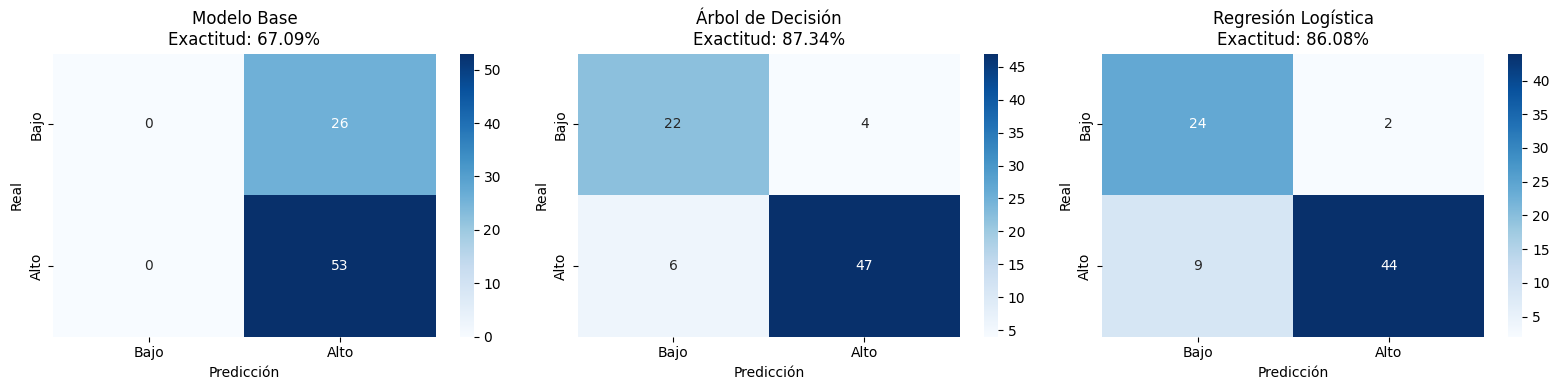


COMPARACIÓN DE MODELOS
   Modelo  Exactitud  Precisión  Cobertura  Puntaje F1
     Base   0.670886   0.670886   1.000000    0.803030
    Árbol   0.873418   0.921569   0.886792    0.903846
Regresión   0.860759   0.956522   0.830189    0.888889


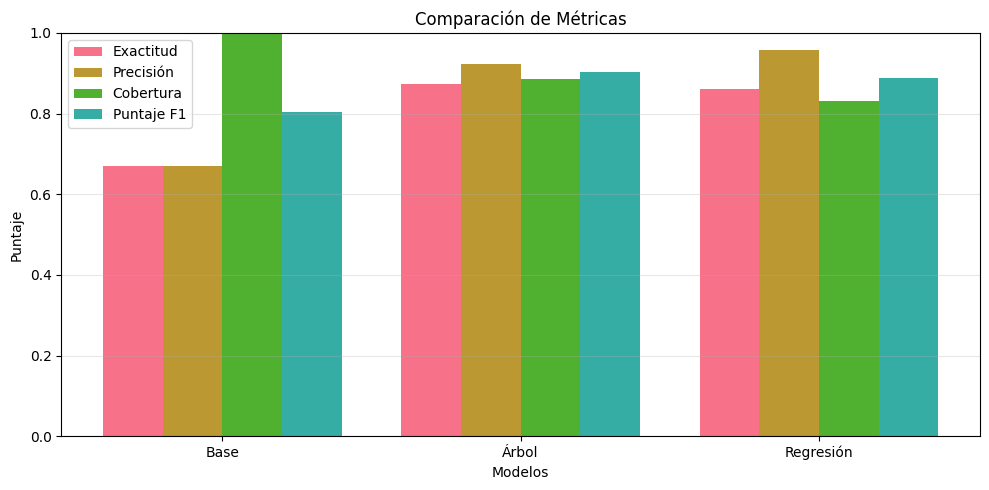


CLASIFICACIÓN DE ATRIBUTOS POR PESO EN LA REPROBACIÓN

Top 15 Factores que más influyen:
                  Variable_ES  Porcentaje
               Nota 2do Corte   93.618309
            Trabajo del Padre    3.477583
               Nota 1er Corte    1.484637
Actividades Extracurriculares    0.864193
        Educación de la Madre    0.555278
        Reprobaciones Previas    0.000000
     Horas de Estudio Semanal    0.000000
                         Edad    0.000000
                 Tiempo Libre    0.000000
Calidad Relaciones Familiares    0.000000
        Frecuencia de Salidas    0.000000
 Consumo Alcohol Entre Semana    0.000000
              Estado de Salud    0.000000
Consumo Alcohol Fin de Semana    0.000000
          Educación del Padre    0.000000

ANÁLISIS POR CATEGORÍAS

Notas Previas: 95.10%
  - Nota 1er Corte: 1.48%
  - Nota 2do Corte: 93.62%

Historial Académico: 0.00%
  - Reprobaciones Previas: 0.00%
  - Número de Ausencias: 0.00%
  - Horas de Estudio Semanal: 0.00%

Apoyo y 

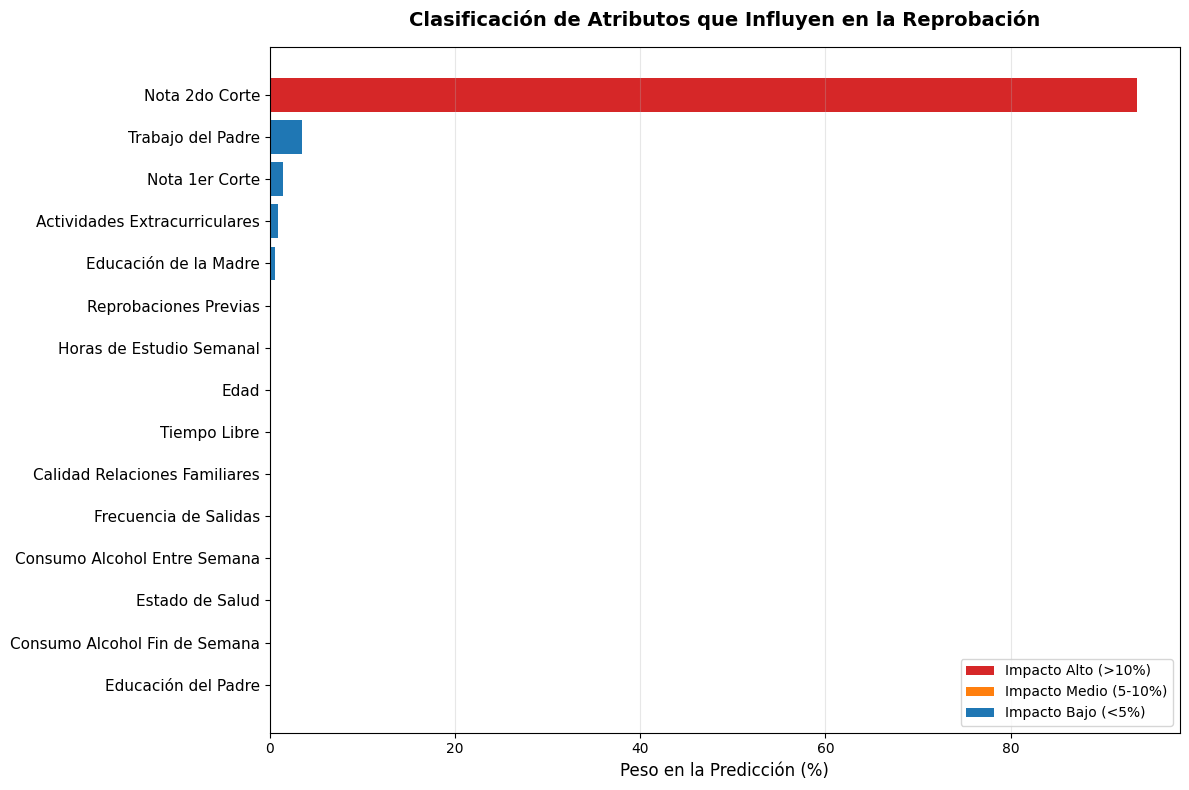


ÁRBOL DE DECISIÓN


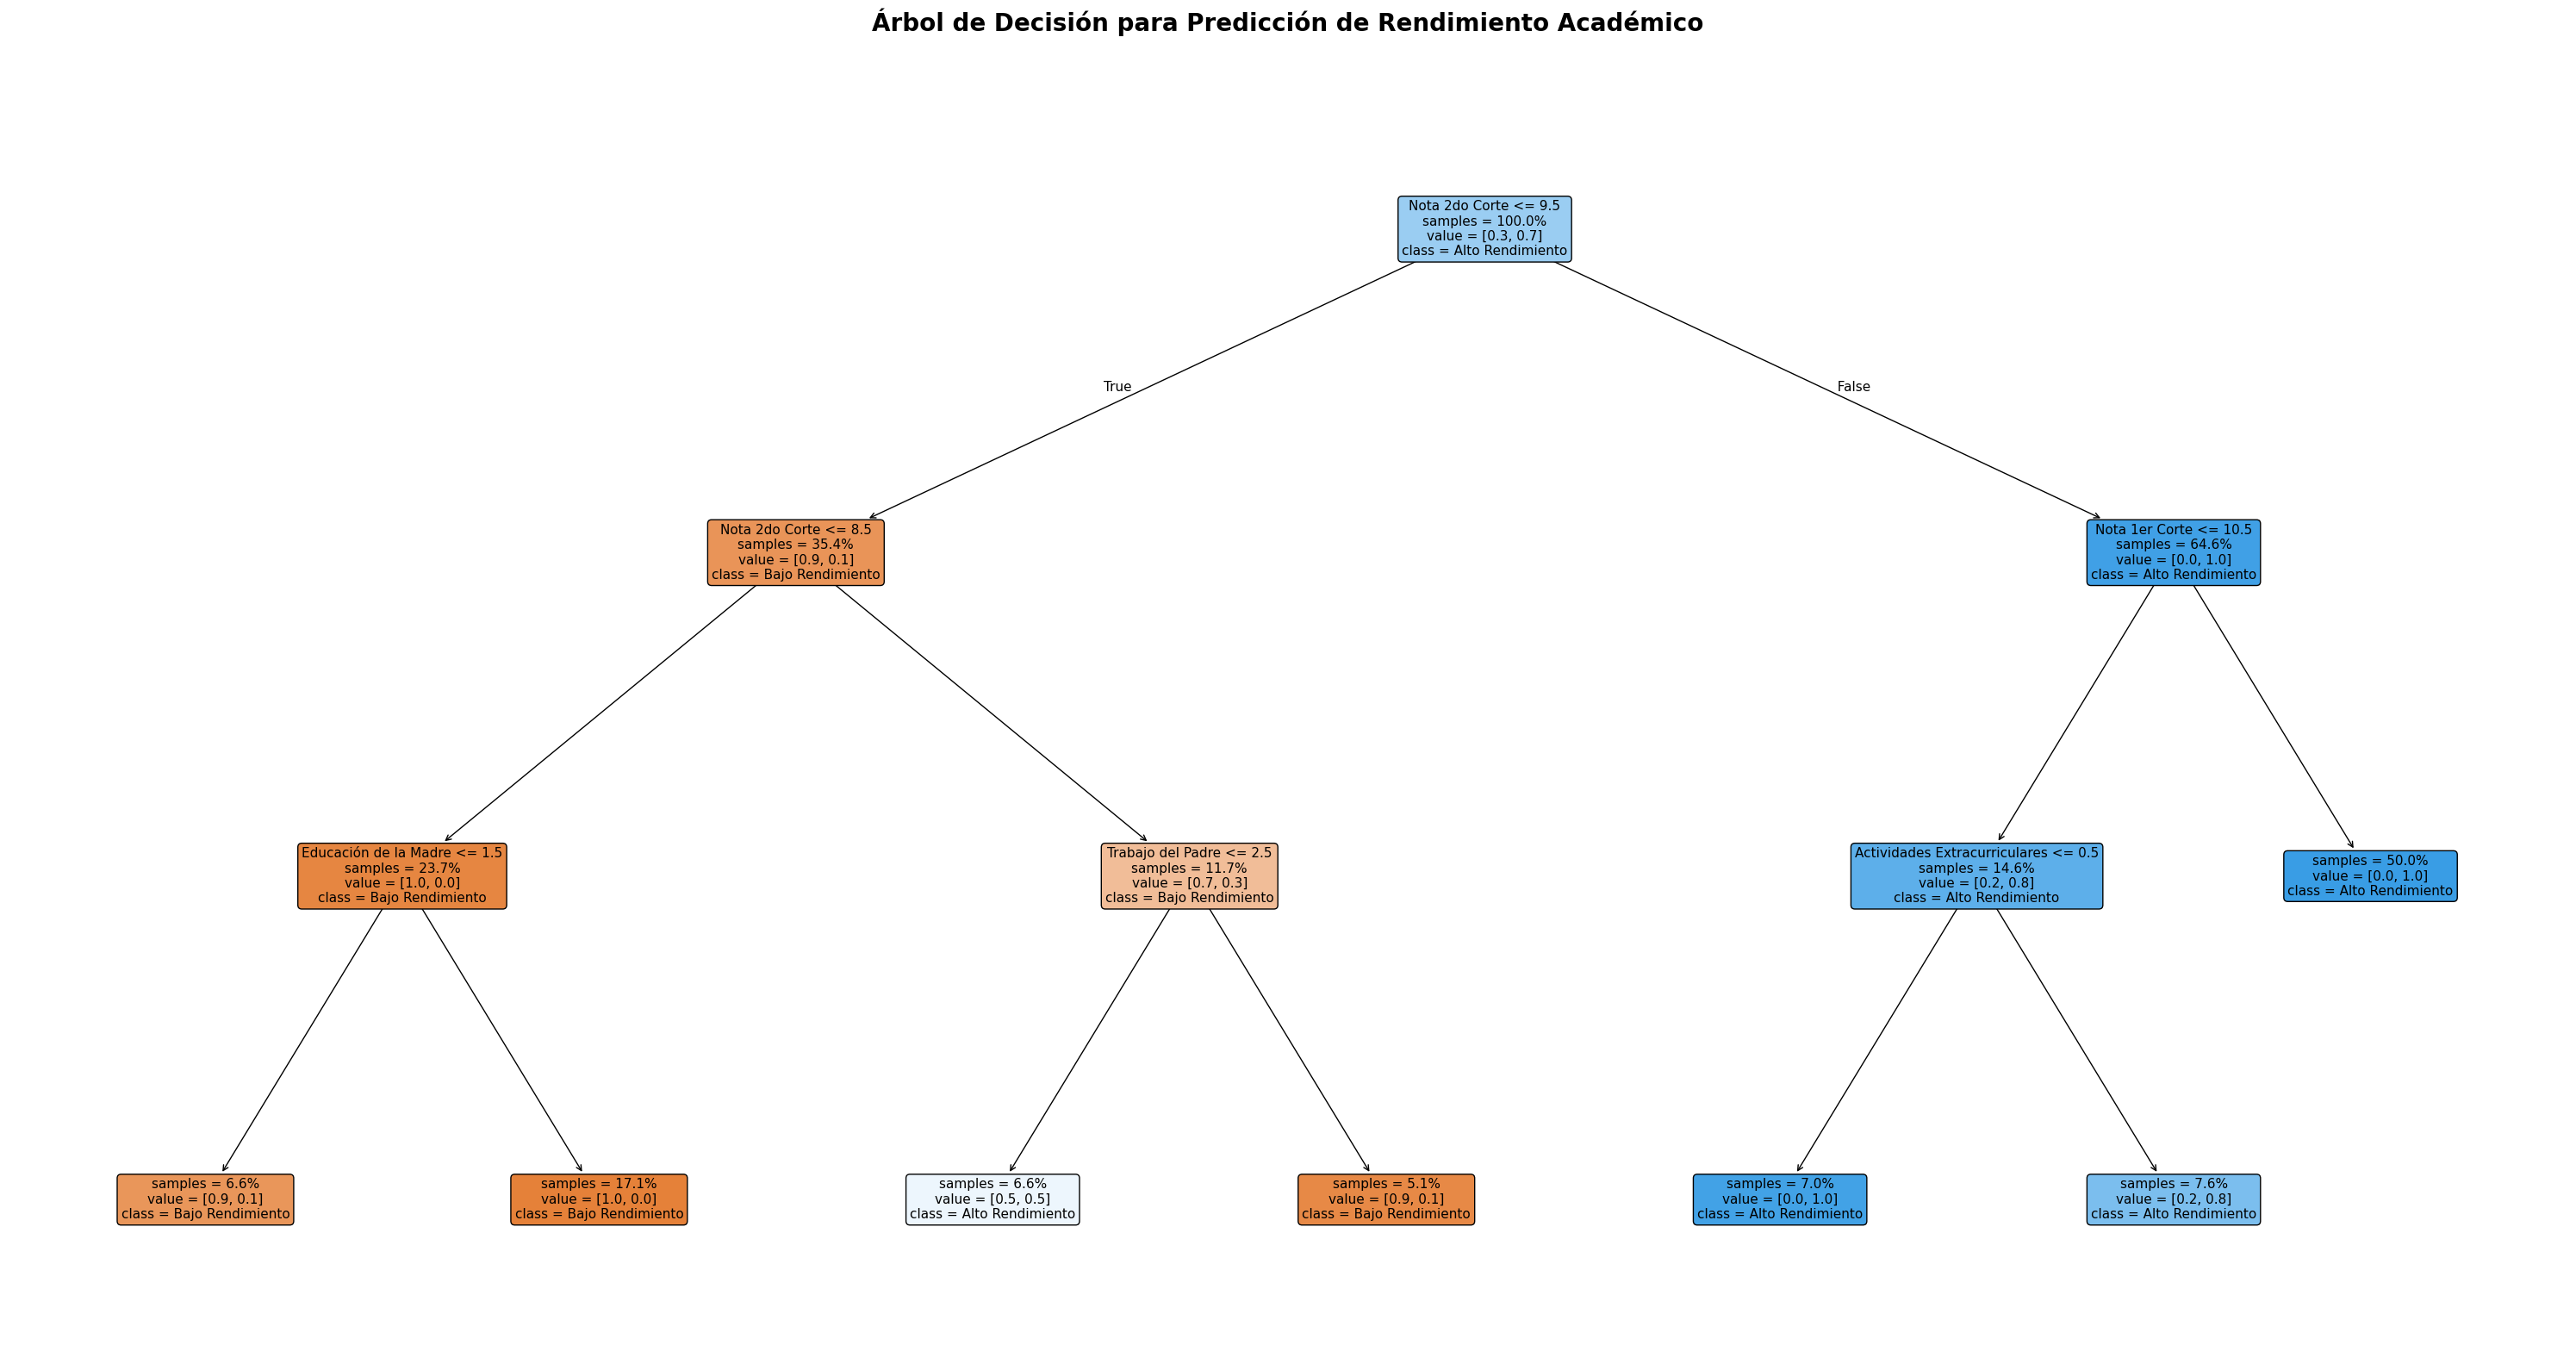


EXPLICACIÓN DEL ÁRBOL DE DECISIÓN

Cada recuadro del árbol muestra:

1. CONDICIÓN: Pregunta sobre una variable
   Ejemplo: 'Nota 2do Corte <= 9.5'
   - Si cumple → va por la rama IZQUIERDA (Sí)
   - Si NO cumple → va por la rama DERECHA (No)

2. SAMPLES (Muestras): Cantidad de estudiantes en ese nodo
   Ejemplo: 'samples = 316' significa que 316 estudiantes llegaron ahí

3. VALUE (Valores): Distribución de clases [Bajo, Alto]
   Ejemplo: 'value = [104, 212]'
   - 104 estudiantes con Bajo Rendimiento
   - 212 estudiantes con Alto Rendimiento

4. CLASS (Clase): Predicción final del nodo
   - 'Bajo Rendimiento' si la mayoría tiene nota < 10
   - 'Alto Rendimiento' si la mayoría tiene nota >= 10

5. COLORES:
   - NARANJA: Predicción de Bajo Rendimiento
   - AZUL: Predicción de Alto Rendimiento
   - Más intenso = más seguridad en la predicción

CURVA ROC Y AUC

Área Bajo la Curva (AUC):
  Árbol de Decisión: 0.9416 (94.16%)
  Regresión Logística: 0.9615 (96.15%)


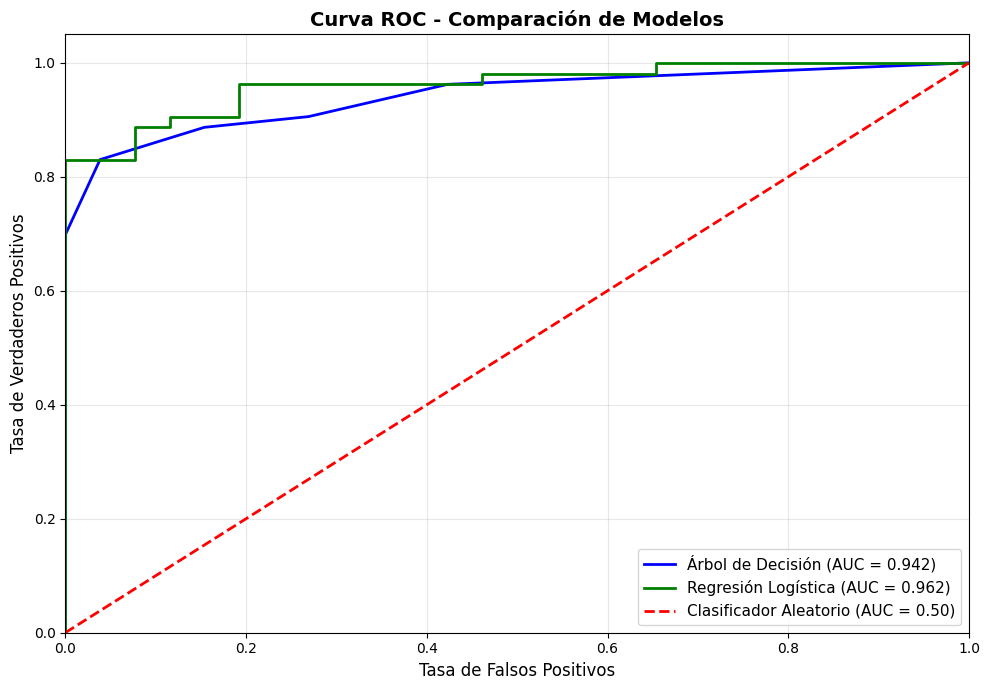


RESUMEN FINAL

Mejor modelo: Árbol
Exactitud (Accuracy): 0.8734 (87.34%)
Precisión (Precision): 0.9216
Cobertura (Recall): 0.8868
Puntaje F1 (F1-Score): 0.9038

Mejora sobre línea base: 30.19%

Objetivo cumplido: Exactitud > 80%


In [ ]:
# PREDICCIÓN DEL RENDIMIENTO ESTUDIANTIL
# Universidad Jorge Tadeo Lozano
# Descargar Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                              f1_score, classification_report, confusion_matrix)
from sklearn.dummy import DummyClassifier
# CARGAR DATOS

df = pd.read_csv('student-mat.csv', sep=';')
print(f"Dataset: {df.shape[0]} estudiantes, {df.shape[1]} variables\n")


# CREAR VARIABLE OBJETIVO

df['rendimiento_alto'] = (df['G3'] >= 10).astype(int)

print("Distribución:")
print(df['rendimiento_alto'].value_counts())
print(f"\nPorcentajes:")
print(df['rendimiento_alto'].value_counts(normalize=True) * 100)


# DICCIONARIO DE TRADUCCIÓN

traducciones = {
    'G2': 'Nota 2do Corte',
    'G1': 'Nota 1er Corte',
    'failures': 'Reprobaciones Previas',
    'absences': 'Número de Ausencias',
    'studytime': 'Horas de Estudio Semanal',
    'age': 'Edad',
    'Medu': 'Educación de la Madre',
    'Fedu': 'Educación del Padre',
    'traveltime': 'Tiempo de Viaje a Clases',
    'famrel': 'Calidad Relaciones Familiares',
    'freetime': 'Tiempo Libre',
    'goout': 'Frecuencia de Salidas',
    'Dalc': 'Consumo Alcohol Entre Semana',
    'Walc': 'Consumo Alcohol Fin de Semana',
    'health': 'Estado de Salud',
    'school': 'Institución Educativa',
    'sex': 'Género',
    'address': 'Tipo de Residencia',
    'famsize': 'Tamaño Familia',
    'Pstatus': 'Estado Civil Padres',
    'Mjob': 'Trabajo de la Madre',
    'Fjob': 'Trabajo del Padre',
    'reason': 'Razón Elección Escuela',
    'guardian': 'Tutor Legal',
    'schoolsup': 'Apoyo Académico Escolar',
    'famsup': 'Apoyo Académico Familiar',
    'paid': 'Clases Particulares',
    'activities': 'Actividades Extracurriculares',
    'nursery': 'Asistió a Preescolar',
    'higher': 'Aspiración Educación Superior',
    'internet': 'Acceso a Internet',
    'romantic': 'Relación Romántica'
}


# SELECCIONAR Y PREPARAR FEATURES

features_num = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime',
                'failures', 'famrel', 'freetime', 'goout', 'Dalc',
                'Walc', 'health', 'absences', 'G1', 'G2']

features_cat = ['school', 'sex', 'address', 'famsize', 'Pstatus',
                'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
                'famsup', 'paid', 'activities', 'nursery', 'higher',
                'internet', 'romantic']

df_processed = df.copy()

print("\nCodificando variables categóricas:")
for col in features_cat:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    print(f"  {col}: {len(le.classes_)} categorías")

all_features = features_num + features_cat

X = df_processed[all_features]
y = df_processed['rendimiento_alto']

print(f"\nDimensiones: X={X.shape}, y={y.shape}")


# DIVIDIR EN ENTRENAMIENTO Y PRUEBA

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nEntrenamiento: {X_train.shape[0]} estudiantes")
print(f"Prueba: {X_test.shape[0]} estudiantes")


# ENTRENAR MODELOS

print("\n" + "="*70)
print("ENTRENANDO MODELOS")


modelo_base = DummyClassifier(strategy='most_frequent', random_state=42)
modelo_base.fit(X_train, y_train)
y_pred_base = modelo_base.predict(X_test)

modelo_arbol = DecisionTreeClassifier(max_depth=3, min_samples_split=30,
                                       min_samples_leaf=15, random_state=42)
modelo_arbol.fit(X_train, y_train)
y_pred_arbol = modelo_arbol.predict(X_test)

modelo_regresion = LogisticRegression(max_iter=1000, random_state=42)
modelo_regresion.fit(X_train, y_train)
y_pred_regresion = modelo_regresion.predict(X_test)

print("Modelos entrenados exitosamente\n")


# EVALUAR MODELOS

def evaluar(y_true, y_pred, nombre):
    print(f"\n{nombre}")
    print("-" * 60)

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    print(f"Exactitud (Accuracy):  {acc:.4f} ({acc*100:.2f}%)")
    print(f"Precisión (Precision): {prec:.4f} ({prec*100:.2f}%)")
    print(f"Cobertura (Recall):    {rec:.4f} ({rec*100:.2f}%)")
    print(f"Puntaje F1 (F1-Score): {f1:.4f} ({f1*100:.2f}%)")

    print("\nReporte detallado:")
    print(classification_report(y_true, y_pred, target_names=['Bajo', 'Alto'],
                                zero_division=0))

    return acc, prec, rec, f1

print("\n" + "="*70)
print("RESULTADOS")


metricas_base = evaluar(y_test, y_pred_base, "MODELO BASE")
metricas_arbol = evaluar(y_test, y_pred_arbol, "ÁRBOL DE DECISIÓN")
metricas_regresion = evaluar(y_test, y_pred_regresion, "REGRESIÓN LOGÍSTICA")


# MATRICES DE CONFUSIÓN

fig, axes = plt.subplots(1, 3, figsize=(16, 4))
modelos = [
    ('Modelo Base', y_pred_base, metricas_base[0]),
    ('Árbol de Decisión', y_pred_arbol, metricas_arbol[0]),
    ('Regresión Logística', y_pred_regresion, metricas_regresion[0])
]

for idx, (nombre, y_pred, acc) in enumerate(modelos):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Bajo', 'Alto'], yticklabels=['Bajo', 'Alto'])
    axes[idx].set_title(f'{nombre}\nExactitud: {acc:.2%}')
    axes[idx].set_ylabel('Real')
    axes[idx].set_xlabel('Predicción')

plt.tight_layout()
plt.show()


# COMPARACIÓN DE MODELOS

resultados = pd.DataFrame({
    'Modelo': ['Base', 'Árbol', 'Regresión'],
    'Exactitud': [metricas_base[0], metricas_arbol[0], metricas_regresion[0]],
    'Precisión': [metricas_base[1], metricas_arbol[1], metricas_regresion[1]],
    'Cobertura': [metricas_base[2], metricas_arbol[2], metricas_regresion[2]],
    'Puntaje F1': [metricas_base[3], metricas_arbol[3], metricas_regresion[3]]
})

print("\n" + "="*70)
print("COMPARACIÓN DE MODELOS")

print(resultados.to_string(index=False))

fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(resultados['Modelo']))
width = 0.2

ax.bar(x - 1.5*width, resultados['Exactitud'], width, label='Exactitud')
ax.bar(x - 0.5*width, resultados['Precisión'], width, label='Precisión')
ax.bar(x + 0.5*width, resultados['Cobertura'], width, label='Cobertura')
ax.bar(x + 1.5*width, resultados['Puntaje F1'], width, label='Puntaje F1')

ax.set_xlabel('Modelos')
ax.set_ylabel('Puntaje')
ax.set_title('Comparación de Métricas')
ax.set_xticks(x)
ax.set_xticklabels(resultados['Modelo'])
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1])

plt.tight_layout()
plt.show()


# CLASIFICACIÓN DE ATRIBUTOS DE MAYOR PESO

importancia = pd.DataFrame({
    'Variable': all_features,
    'Importancia': modelo_arbol.feature_importances_
}).sort_values('Importancia', ascending=False)

importancia['Variable_ES'] = importancia['Variable'].map(traducciones)
importancia['Porcentaje'] = importancia['Importancia'] * 100

print("\n" + "="*70)
print("CLASIFICACIÓN DE ATRIBUTOS POR PESO EN LA REPROBACIÓN")

print("\nTop 15 Factores que más influyen:")
print(importancia.head(15)[['Variable_ES', 'Porcentaje']].to_string(index=False))

print("\n" + "="*70)
print("ANÁLISIS POR CATEGORÍAS")


categorias = {
    'Notas Previas': ['G1', 'G2'],
    'Historial Académico': ['failures', 'absences', 'studytime'],
    'Apoyo y Recursos': ['schoolsup', 'famsup', 'paid', 'internet'],
    'Contexto Familiar': ['Medu', 'Fedu', 'famrel', 'Pstatus'],
    'Factores Sociales': ['goout', 'Dalc', 'Walc', 'romantic'],
    'Otros': ['age', 'health', 'freetime', 'activities']
}

for categoria, vars_cat in categorias.items():
    peso_total = importancia[importancia['Variable'].isin(vars_cat)]['Importancia'].sum() * 100
    print(f"\n{categoria}: {peso_total:.2f}%")
    for var in vars_cat:
        if var in importancia['Variable'].values:
            peso = importancia[importancia['Variable'] == var]['Porcentaje'].values[0]
            var_nombre = traducciones[var]
            print(f"  - {var_nombre}: {peso:.2f}%")

plt.figure(figsize=(12, 8))
top15 = importancia.head(15)
colores = ['#d62728' if x > 10 else '#ff7f0e' if x > 5 else '#1f77b4'
           for x in top15['Porcentaje']]

plt.barh(range(len(top15)), top15['Porcentaje'], color=colores)
plt.yticks(range(len(top15)), top15['Variable_ES'], fontsize=11)
plt.xlabel('Peso en la Predicción (%)', fontsize=12)
plt.title('Clasificación de Atributos que Influyen en la Reprobación',
          fontsize=14, fontweight='bold', pad=15)
plt.grid(axis='x', alpha=0.3)

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#d62728', label='Impacto Alto (>10%)'),
    Patch(facecolor='#ff7f0e', label='Impacto Medio (5-10%)'),
    Patch(facecolor='#1f77b4', label='Impacto Bajo (<5%)')
]
plt.legend(handles=legend_elements, loc='lower right', fontsize=10)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# ÁRBOL DE DECISIÓN EN ESPAÑOL

print("\n" + "="*70)
print("ÁRBOL DE DECISIÓN")


nombres_espanol = [traducciones[feat] for feat in all_features]

plt.figure(figsize=(30, 16))
plot_tree(modelo_arbol,
          feature_names=nombres_espanol,
          class_names=['Bajo Rendimiento', 'Alto Rendimiento'],
          filled=True,
          rounded=True,
          fontsize=11,
          proportion=True,
          precision=1,
          impurity=False)
plt.title('Árbol de Decisión para Predicción de Rendimiento Académico',
          fontsize=20, fontweight='bold', pad=30)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("EXPLICACIÓN DEL ÁRBOL DE DECISIÓN")
print("\nCada recuadro del árbol muestra:")
print("\n1. CONDICIÓN: Pregunta sobre una variable")
print("   Ejemplo: 'Nota 2do Corte <= 9.5'")
print("   - Si cumple → va por la rama IZQUIERDA (Sí)")
print("   - Si NO cumple → va por la rama DERECHA (No)")

print("\n2. SAMPLES (Muestras): Cantidad de estudiantes en ese nodo")
print("   Ejemplo: 'samples = 316' significa que 316 estudiantes llegaron ahí")

print("\n3. VALUE (Valores): Distribución de clases [Bajo, Alto]")
print("   Ejemplo: 'value = [104, 212]'")
print("   - 104 estudiantes con Bajo Rendimiento")
print("   - 212 estudiantes con Alto Rendimiento")

print("\n4. CLASS (Clase): Predicción final del nodo")
print("   - 'Bajo Rendimiento' si la mayoría tiene nota < 10")
print("   - 'Alto Rendimiento' si la mayoría tiene nota >= 10")

print("\n5. COLORES:")
print("   - NARANJA: Predicción de Bajo Rendimiento")
print("   - AZUL: Predicción de Alto Rendimiento")
print("   - Más intenso = más seguridad en la predicción")




# CURVA ROC Y AUC

from sklearn.metrics import roc_curve, auc

print("\n" + "="*70)
print("CURVA ROC Y AUC")

y_prob_arbol = modelo_arbol.predict_proba(X_test)[:, 1]
y_prob_regresion = modelo_regresion.predict_proba(X_test)[:, 1]

fpr_arbol, tpr_arbol, _ = roc_curve(y_test, y_prob_arbol)
fpr_regresion, tpr_regresion, _ = roc_curve(y_test, y_prob_regresion)

auc_arbol = auc(fpr_arbol, tpr_arbol)
auc_regresion = auc(fpr_regresion, tpr_regresion)

print(f"\nÁrea Bajo la Curva (AUC):")
print(f"  Árbol de Decisión: {auc_arbol:.4f} ({auc_arbol*100:.2f}%)")
print(f"  Regresión Logística: {auc_regresion:.4f} ({auc_regresion*100:.2f}%)")

plt.figure(figsize=(10, 7))
plt.plot(fpr_arbol, tpr_arbol, color='blue', lw=2,
         label=f'Árbol de Decisión (AUC = {auc_arbol:.3f})')
plt.plot(fpr_regresion, tpr_regresion, color='green', lw=2,
         label=f'Regresión Logística (AUC = {auc_regresion:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--',
         label='Clasificador Aleatorio (AUC = 0.50)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=12)
plt.title('Curva ROC - Comparación de Modelos', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# RESUMEN FINAL

mejor = resultados.loc[resultados['Exactitud'].idxmax()]
mejora = ((mejor['Exactitud'] - metricas_base[0]) / metricas_base[0]) * 100

print("\n" + "="*70)
print("RESUMEN FINAL")
print(f"\nMejor modelo: {mejor['Modelo']}")
print(f"Exactitud (Accuracy): {mejor['Exactitud']:.4f} ({mejor['Exactitud']*100:.2f}%)")
print(f"Precisión (Precision): {mejor['Precisión']:.4f}")
print(f"Cobertura (Recall): {mejor['Cobertura']:.4f}")
print(f"Puntaje F1 (F1-Score): {mejor['Puntaje F1']:.4f}")
print(f"\nMejora sobre línea base: {mejora:.2f}%")

if mejor['Exactitud'] >= 0.80:
    print("\nObjetivo cumplido: Exactitud > 80%")
else:
    print(f"\nObjetivo no cumplido: {mejor['Exactitud']*100:.2f}%")